In [14]:
from pytorch_grad_cam import GradCAM, HiResCAM, ScoreCAM, GradCAMPlusPlus, AblationCAM, XGradCAM, EigenCAM, FullGrad
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
from pytorch_grad_cam.utils.image import show_cam_on_image
from torchvision.models import resnet50,ResNet50_Weights
from torchvision.io import read_image, ImageReadMode
import torchvision
import numpy as np
from PIL import Image
import keras
import os
import shutil
import matplotlib.pyplot as plt

Preparing dataset

In [2]:
images = os.listdir("./imagenet-5-categories/test")
for img in images:
    str=""
    for s in img:
        if(s=='_'):
            break
        str = str + s
    shutil.copyfile(f"./imagenet-5-categories/test/{img}",f"./imagenet-5-categories/{str}/{img}")
print("Transferred all the Images to respective Folders")

Transferred all the Images to respective Folders


Initializing Model and the target layers

In [4]:
model = resnet50(weights=ResNet50_Weights.IMAGENET1K_V2)
target_layers = [model.layer4[-1]]

In [5]:
def get_img_array(img_path, size):
    img = keras.utils.load_img(img_path, target_size=size)
    array = keras.utils.img_to_array(img)
    array = np.expand_dims(array, axis=0)
    return array

img_size = (224, 224)
# array = get_img_array(img_path, size=img_size)

Taking a subset of Imagenet having 5 classes -> Airplane, Car, Cat, Dog, Elephant having 300 images each

In [6]:
labels = {"airplane":[403,404,405],"cat":[281,282,283,284,285,286],"car":[751,817,829],"dog":[153,229,230,235,238,239,245,248,251,254,207,208],"elephant":[385,386]}

Get Maps , pass either single image or a batch of images

In [8]:
def Map(cam, input_tensor,target,image,labels):

    targets = []
    for key in labels:
        if(key==target):
            for value in labels[key]:
                targets.append(ClassifierOutputTarget(value))
    print(targets)
    grayscale_cam = cam(input_tensor=input_tensor, targets=None)
    grayscale_cam = grayscale_cam[0, :]
    visualization = show_cam_on_image(image, grayscale_cam, use_rgb=True)

    # You can also get the model outputs without having to re-inference
    model_outputs = cam.outputs

    return visualization

In [9]:
def preprocess(img_path):
    input_tensor = read_image(img_path,mode=ImageReadMode.RGB)
    input_tensor = input_tensor.float() # creating input tensor
    input_tensor.unsqueeze_(0)

    image = Image.open(img_path)
    image = np.array(image)
    image = image/255.

    return input_tensor,image

In [10]:
def apply_cam_on_dataset(cam,path,target,labels):
    img_path = os.listdir(path)
    for img in img_path:
        input_tensor,image = preprocess(path+"/"+img)
        visualization = Map(cam,input_tensor,target,image,labels)
        np.save(f"./imagenet-5-categories/grad_cam_{target}/{img}.npy",visualization)

In [11]:
# Construct the CAM object once, and then re-use it on many images:
cam = GradCAM(model=model, target_layers=target_layers)

path_airplane = "./imagenet-5-categories/airplane"
apply_cam_on_dataset(cam,path_airplane,"airplane",labels)

path_elephant = "./imagenet-5-categories/elephant"
apply_cam_on_dataset(cam,path_elephant,"elephant",labels)

path_cat = "./imagenet-5-categories/cat"
apply_cam_on_dataset(cam,path_cat,"cat",labels)

path_car = "./imagenet-5-categories/car"
apply_cam_on_dataset(cam,path_car,"car",labels)

path_dog = "./imagenet-5-categories/dog"
apply_cam_on_dataset(cam,path_dog,"dog",labels)


[<pytorch_grad_cam.utils.model_targets.ClassifierOutputTarget object at 0x000001CE26F7B200>, <pytorch_grad_cam.utils.model_targets.ClassifierOutputTarget object at 0x000001CE26F7AAE0>, <pytorch_grad_cam.utils.model_targets.ClassifierOutputTarget object at 0x000001CE267369F0>]
[<pytorch_grad_cam.utils.model_targets.ClassifierOutputTarget object at 0x000001CE26331B20>, <pytorch_grad_cam.utils.model_targets.ClassifierOutputTarget object at 0x000001CE27066D20>, <pytorch_grad_cam.utils.model_targets.ClassifierOutputTarget object at 0x000001CE27066600>]
[<pytorch_grad_cam.utils.model_targets.ClassifierOutputTarget object at 0x000001CE27067800>, <pytorch_grad_cam.utils.model_targets.ClassifierOutputTarget object at 0x000001CE270663C0>, <pytorch_grad_cam.utils.model_targets.ClassifierOutputTarget object at 0x000001CE26F78950>]
[<pytorch_grad_cam.utils.model_targets.ClassifierOutputTarget object at 0x000001CE270663C0>, <pytorch_grad_cam.utils.model_targets.ClassifierOutputTarget object at 0x000

Test

In [13]:
def test_cam(path):
    img = np.load(path)
    plt.imshow(img)

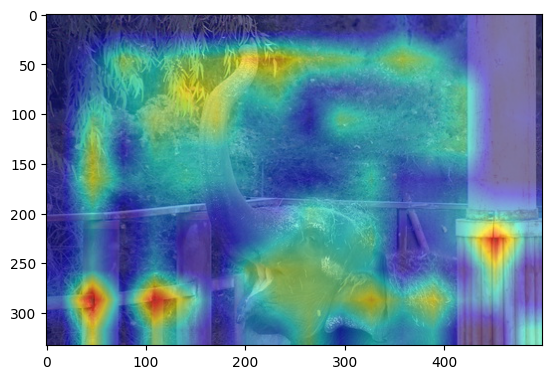

In [17]:
path = "./imagenet-5-categories/grad_cam_elephant/elephant_171247089_59042a2b95.jpg.npy"
test_cam(path)